<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 02:  Statistic for data analysis**

## **Outline**

1. [Ejercicio 1. Means and std](#eje1)
2. [Ejercicio 2. Normal distributions](#eje2)
2. [Ejercicio 3. CLT Analytical](#eje3)
2. [Ejercicio 4. CLT Computacional](#eje4)
2. [Ejercicio 5. Clasification from distributions](#eje5)



In [42]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
#os.chdir('/content/drive/My Drive/main/academic/courses/2018-UIS-AritfitialInteligence/ai-uis-student/talleres20202')
os.chdir('/content/drive/My Drive/ai-uis-student/talleres20202')

print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ai-uis-student/talleres20202


---
#### Usted debe ejecutar **TODAS** las celdas de tipo **CODE**. De lo contrario, sus respuestas no serán procesadas correctamente.
---

---
## **Dataset de cancer de mama**

En los siguientes puntos vamos a explorar un dataset que contiene los datos de 569 pacientes relacionados con cancer de mama. El dataset contiene un total de 30 atributos que caracterizan a cada paciente, con variables que caracterizan las celulas, como: 

- radio
- textura
- perimetro
- area, convavidad ... entre otras

Cada uno de los casos registrato está categorizado como benigno `(B)` o maligno `(M)`. Observe el dataset en las siguientes lineas y tenga en cuenta el `dataframe` donde quedaron almacenados los valores para ser trabajados en los siguientes puntos. 


---

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0


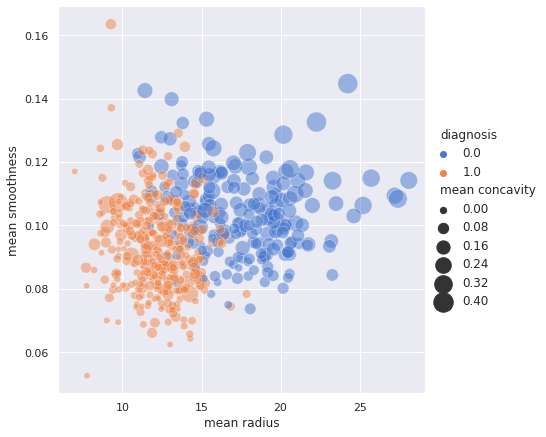

In [28]:
#@title **Breast cancer dataset**
variable_x = "mean radius" #@param {type:"string"}
variable_y = "mean smoothness" #@param {type:"string"}
variable_s = "mean concavity" #@param {type:"string"}


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
sns.set_theme()


cancer = load_breast_cancer()
data_bc = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['diagnosis']))
sns.relplot(x=variable_x, y=variable_y, hue="diagnosis", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_bc)

data_bc.head(2)

# **Ejercicio 1**  <a name="eje1"></a>

Construya una función que calcule la media y desviación estandard para cada una de las variables en `data_bc` que representan las variables que caracterizan cada paciente. No debe calcular esta información para "diagnosis". Las medias y desviaciones estandar **deben** calcularse para el grupo ""benigno==0" y "maligno==1", según la información en la Serie: `diagnosis`

- Devuelva una lista con las medias "benignas"
- Devuelva una lista con las desviaciones estandard "benignas". 
- Devuelva una lista con las medias "malignas"
- Devuelva una lista con las desviaciones estandard "malignas". 



In [29]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas

def fun_21161120(data_bc):
    import numpy as np 
    import pandas as pd
    filasB = data_bc[data_bc.diagnosis==0.0].iloc[:,0:30].values
    filasM = data_bc[data_bc.diagnosis==1.0].iloc[:,0:30].values 
    #medias_ben   = np.array([[sum(filas[:,i])/569 for i in range(30)]])
    medias_ben   = np.array([[filasB[:,i].mean() for i in range(30)]])[0]
    stds_ben     = np.array([[filasB[:,i].std() for i in range(30)]])[0]
    medias_mal   = np.array([[filasM[:,i].mean() for i in range(30)]])[0]
    stds_mal     = np.array([[filasM[:,i].std() for i in range(30)]])[0]
    
    return medias_ben, stds_ben, medias_mal,stds_mal

import urllib.parse, inspect
src21161120 = urllib.parse.quote_plus(inspect.getsource(fun_21161120))


In [30]:
#@title **verifique su respuesta**
import numpy as np
medias_ben, stds_ben, medias_mal,stds_mal = fun_21161120(data_bc)
print( "mean B shape: ", medias_ben.shape, "std B shape: ", stds_ben.shape,\
       "mean M shape: ", medias_mal.shape, "std M shape: ", stds_mal.shape)
print("means B:\n", medias_ben)
print("means M:\n ", medias_mal)

mean B shape:  (30,) std B shape:  (30,) mean M shape:  (30,) std M shape:  (30,)
means B:
 [1.74628302e+01 2.16049057e+01 1.15365377e+02 9.78376415e+02
 1.02898491e-01 1.45187783e-01 1.60774717e-01 8.79900000e-02
 1.92908962e-01 6.26800943e-02 6.09082547e-01 1.21091462e+00
 4.32392925e+00 7.26724057e+01 6.78009434e-03 3.22811651e-02
 4.18240094e-02 1.50604717e-02 2.04724009e-02 4.06240566e-03
 2.11348113e+01 2.93182075e+01 1.41370330e+02 1.42228632e+03
 1.44845236e-01 3.74824104e-01 4.50605566e-01 1.82237311e-01
 3.23467925e-01 9.15299528e-02]
means M:
  [1.21465238e+01 1.79147619e+01 7.80754062e+01 4.62790196e+02
 9.24776471e-02 8.00846218e-02 4.60576210e-02 2.57174062e-02
 1.74185994e-01 6.28673950e-02 2.84082353e-01 1.22038011e+00
 2.00032129e+00 2.11351485e+01 7.19590196e-03 2.14382465e-02
 2.59967356e-02 9.85765266e-03 2.05838067e-02 3.63605126e-03
 1.33798011e+01 2.35150700e+01 8.70059384e+01 5.58899440e+02
 1.24959496e-01 1.82672549e-01 1.66237723e-01 7.44443445e-02
 2.70245938

In [31]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS2_21161120 $src21161120

evaluation result CORRECT


# **Ejercicio 2**  <a name="eje2"></a>

**Asumiendo que las variables del dataset siguen distribuciones normales!**. Utilice los resultados en el anterior punto para calcular las distribuciones normales de las variables (discriminadas entre benigno y maligno). Utilice el `scipy` para calcular objetos de las distribuciones normales. La función debe:

- Recibir el dataset, el vector de medias y desviaciones estandar para las clases Benigno y Maligno, respectivamente

- Retornar el vector de datos de `mean radius` para los valores benignos.
- Retornar una lista `p_b` con los objetos `scipy` para las distribuciones normales que representan la población `Benigno`
- Retornar una lista `p_m` con los objetos `scipy` para las distribuciones normales que representan la población `Maligno`



In [32]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas

def fun_22161120(data_bc, m_b, m_m, s_b, s_m):
    import numpy as np 
    import pandas as pd
    import scipy.stats as stats

    p_b = np.array([stats.norm(loc=m_b[i], scale=s_b[i]) for i in range(30)])
    p_m = np.array([stats.norm(loc=m_m[i], scale=s_m[i]) for i in range(30)])
    var = data_bc[data_bc.diagnosis==0.0].iloc[:,0].values

    return var, p_b, p_m

import urllib.parse, inspect
src22161120 = urllib.parse.quote_plus(inspect.getsource(fun_22161120))



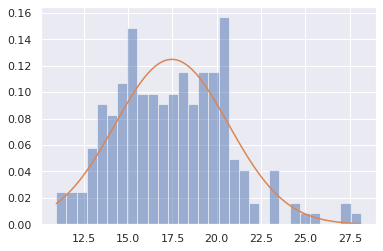

In [33]:
#@title **verifique su respuesta**
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set_theme()
m_b, s_b, m_m,s_m = fun_21161120(data_bc)
var, p_b, p_m = fun_22161120(data_bc, m_b, m_m, s_b, s_m)

plt.hist(var, bins=30, density=True, alpha=.5, label="samples");
t = np.linspace(np.min(var), np.max(var), 100)
plt.plot(t, p_b[0].pdf(t), label="pdf");

In [ ]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS2_22161120 $src22161120

evaluation result CORRECT


# **Ejercicio 3**  <a name="eje3"></a>

**Sin asumir que las variables son normales!. Entonces usamos CLT de forma analítica**

**$\mathcal{N} \left ( \mu(X), \frac{\sigma(X)}{\sqrt{N}} \right )$**

Vamos a crear una función que aproxime cada una de las variables del dataset por una distribución normal teniendo en cuenta el teorema del límite central (CLT). Para ello se debe tener en cuenta el número de *N* muestras consideradas en cada experimento. Calcule las distribuciones normales siguiendo el CLT de las variables (discriminadas entre benigno y maligno). Utilice el `scipy` para calcular objetos de las distribuciones normales y el teorema de CLT. La función debe:

- Recibir el dataset, el vector de medias y desviaciones estandar para las clases Benigno y Maligno, respectivamente

- Retornar el vector de datos de `mean radius` para los valores benignos.
- Retornar una lista `p_b` con los objetos `scipy` para las distribuciones normales que representan la población `Benigno`. Recuerde el CLT
- Retornar una lista `p_m` con los objetos `scipy` para las distribuciones normales que representan la población `Maligno`. Recuerde el CLT
- Devuelva una lista con los intervalos de confianza para cada distribución tanto de variables benignas, como malignas para cada variable




In [34]:
#@title **2172969**
#@ markdown No modifique las dos últimas lineas

def fun_23161120(data_bc, m_b, m_m, s_b, s_m, N, p):
    import numpy as np 
    import pandas as pd
    import scipy.stats as stats

    p_b = np.array([stats.norm(loc=m_b[i], scale=s_b[i]/np.sqrt(N)) for i in range(30)])
    p_m = np.array([stats.norm(loc=m_m[i], scale=s_m[i]/np.sqrt(N)) for i in range(30)])
    in_b = np.array([i.interval(p) for i in p_b])
    in_v = np.array([i.interval(p) for i in p_m])
    var = data_bc[data_bc.diagnosis==0.0].iloc[:,0].values

    return var, p_b, p_m, in_b, in_v

import urllib.parse, inspect
src23161120 = urllib.parse.quote_plus(inspect.getsource(fun_23161120))



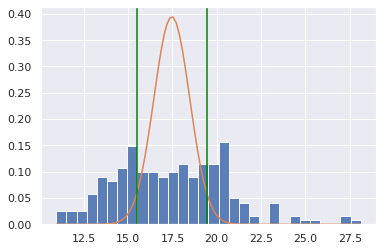

In [35]:
#@title **verifique su respuesta**
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set_theme()
N=10
p=0.95
m_b, s_b, m_m,s_m = fun_21161120(data_bc)
var, p_b, p_m, in_b, in_v = fun_23161120(data_bc, \
                                         m_b, m_m, s_b, s_m, N, p)

plt.hist(var, bins=30, density=True, alpha=.9, label="samples");
t = np.linspace(np.min(var), np.max(var), 100);
plt.plot(t, p_b[0].pdf(t), label="pdf");
plt.axvline(in_b[0][0], color="green");
plt.axvline(in_b[0][1], color="green");

In [ ]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS2_23161120 $src23161120

evaluation result CORRECT


# **Ejercicio 4**  <a name="eje4"></a>


**Sin asumir que las variables son normales!. Entonces usamos CLT de forma EMPIRICA**

_RECUERDE:_ Para calcular el CLT de forma empírica (computacional), la función debe: 

1. Calcular los promedios tomando $N$ muestras en un total de 1000 experimentos independientes (realice 1000 iteraciones tomando cada subconjunto de N muestras).
    - Cada conjunto de muestran son seleccionadas de forma aleatoria del conjunto de datos.
    - Cada vez que toma las N muestras se calcula la media y se guarda este valor en una lista.  

Vamos a crear una función que aproxime cada una de las variables del dataset por una distribución normal teniendo en cuenta el teorema del límite central (CLT) de forma **EMPIRICA**. Para ello se debe tener en cuenta el número de *N* muestras consideradas en cada experimento. Calcule las distribuciones normales siguiendo el CLT de las variables (discriminadas entre benigno y maligno). Utilice el `scipy` para calcular objetos de las distribuciones normales. La función debe:

- Recibir el dataset y el valor N para tomar aleatoriamente los subconjuntos de datos. 

- Retornar el vector de datos de `mean radius` para los valores benignos.
- Retornar una lista `p_b` con los objetos `scipy` para las distribuciones normales que representan la población `Benigno`. Recuerde el CLT
- Retornar una lista `p_m` con los objetos `scipy` para las distribuciones normales que representan la población `Maligno`. Recuerde el CLT
- Devuelva una lista `experiment` con las 1000 medias calculadas de cada experimento con N muestras aleatoras. 







In [36]:
#@title **2172969**
#@ markdown No modifique las dos últimas lineas

def fun_24161120(data_bc, N):
  import numpy as np 
  import pandas as pd
  import scipy.stats as stats
  from sklearn.datasets import load_breast_cancer
  cancer = load_breast_cancer()

  data_bc_temp = data_bc.copy()
  diagnosis = data_bc_temp["diagnosis"].values
  del data_bc_temp["diagnosis"]
  data_b = data_bc_temp[diagnosis==0]
  data_m = data_bc_temp[diagnosis==1]

  benign = []
  malign = []
  for _ in range(1000):
    benign.append(np.mean(data_b.sample(n=N), axis=0))
    malign.append(np.mean(data_m.sample(n=N), axis=0))

  medias_ben   = np.mean(np.array(benign), axis = 0)
  stds_ben     = np.std(np.array(benign), axis = 0)
  medias_mal   = np.mean(np.array(malign), axis = 0)
  stds_mal     = np.std(np.array(malign), axis = 0)


  p_b = [stats.norm(loc=medias_ben[i], scale=stds_ben[i]/np.sqrt(N)) for i in range(30)]
  p_m = [stats.norm(loc=medias_mal[i], scale=stds_mal[i]/np.sqrt(N)) for i in range(30)]
  var = data_bc[data_bc.diagnosis==0.0].iloc[:,0].values
  experiment = np.array(benign)[:,0] 
  return var, experiment, p_b, p_m

import urllib.parse, inspect
src24161120 = urllib.parse.quote_plus(inspect.getsource(fun_24161120))


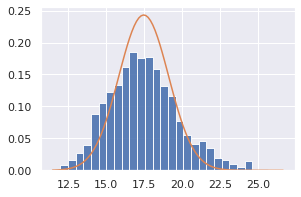

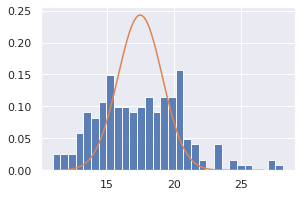

In [37]:
#@title **verifique su respuesta**
N=2
var, experiment, p_b, p_m = fun_24161120(data_bc, N)

plt.figure(figsize=(10,3))
plt.subplot(1,2, 1)
plt.hist(experiment, bins=30, density=True, alpha=.9);
t = np.linspace(np.min(experiment), np.max(experiment), 100)
plt.plot(t, p_b[0].pdf(t), label="pdf");
plt.figure(figsize=(10,3))
plt.subplot(1,2,2)
plt.hist(var, bins=30, density=True, alpha=.9);
plt.plot(t, p_b[0].pdf(t), label="pdf");

In [38]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS2_24161120 $src24161120

evaluation result CORRECT


# **Ejercicio 5**  <a name="eje5"></a>

**Asumiendo que el dataset tiene aproximadamente la misma proporción de registros "malignos", como "benignos"**. 

Vamos a usar las distribuciones de las variables que hemos contruido para decidir si un registro de un paciente "x" particular puede ser catalogado como un caso "benigno" o como "maligno". Para ello debemos: 

- Recibir el registro `X` que se desea evaluar, una lista de las distribuciones normales benignas `p_b` y las distribuciones normales malignas  `p_m`,
- Calcular tanto para las distribuciones "Benigno" como "maligno";

$$p_i = \prod_{k=1}^m P_{\mu_k,\sigma_k}(x_{i,k})$$

en donde

$P_{\mu_k,\sigma_k}(x_{i,k})$ es la probabilidad de $x_{i,k}$ según una distribución normal con media $\mu_k$ y desviación estándar $\sigma_k$. Es decir se cálcula la multiplicatoria de las pdf evaluadas en x.

- Devolver los resultados de cada multiplicatoria y el string "B" o "M" según la mayor probabilidad obtenida, es decir: $P_b \geq P_m \to B$


In [39]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas

def fun_25161120(X, p_b, p_m):
  import numpy as np

  be = 1
  ma = 1
  for i in range(len(X)):
    be *= p_b[i].pdf(X[i]) 
    ma *= p_m[i].pdf(X[i]) 
  
  #clase = "B" if be>=ma else "M"
  clase = "B" if be>=ma else "M"

  return clase, be, ma



import urllib.parse, inspect
src25161120 = urllib.parse.quote_plus(inspect.getsource(fun_25161120))

In [40]:
#@title **verifique su respuesta**
Ejemplo =50
X = load_breast_cancer().data[Ejemplo]
target = load_breast_cancer().target[Ejemplo]
var, p_b, p_m = fun_22161120(data_bc, m_b, m_m, s_b, s_m)
var, experiment, p_b_CLT, p_m_CLT = fun_24161120(data_bc, N)


print("el registro es: ", X)
print("la clase real es: ",  target)

clase, be, ma = fun_25161120(X, p_b, p_m)
clase_CLT, be_CLT, ma_CLT = fun_25161120(X, p_b_CLT, p_m_CLT)


print("la clase  predicha es: ", clase, " P_b: ",  be, " P_m: ",  ma)
print("la clase CLT predicha es: ", clase_CLT, " P_b: ",  be_CLT, " P_m: ",  ma_CLT)

el registro es:  [1.176e+01 2.160e+01 7.472e+01 4.279e+02 8.637e-02 4.966e-02 1.657e-02
 1.115e-02 1.495e-01 5.888e-02 4.062e-01 1.210e+00 2.635e+00 2.847e+01
 5.857e-03 9.758e-03 1.168e-02 7.445e-03 2.406e-02 1.769e-03 1.298e+01
 2.572e+01 8.298e+01 5.165e+02 1.085e-01 8.615e-02 5.523e-02 3.715e-02
 2.433e-01 6.563e-02]
la clase real es:  1
la clase  predicha es:  M  P_b:  1.5158406314882775e-09  P_m:  133089367.94598405
la clase CLT predicha es:  M  P_b:  2.3981942706664586e-43  P_m:  100469219.68350622


In [41]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS2_25161120 $src25161120

evaluation result CORRECT


# **Pasos Finales.**



#### 1. Reemplace la variable con su código de estudiante

In [ ]:
#@title **1. Complete la siguiente información:**
taller_name = "Taller_std_02_20202" #@param {type:"string"}
codigo_name = "tl2_2172969" #@param {type:"string"}


import urllib.parse, inspect
taller = urllib.parse.quote_plus(taller_name)
codigo = urllib.parse.quote_plus(codigo_name)

print(taller, codigo)

Taller_std_02_20202 tl2_12345


In [ ]:
#@title **2. Guarde los cambios del taller**
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [ ]:
#@title **3. Ejecute la siguiente celda y envíe el archivo**
!./convert_ipynb.sh $codigo $taller

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>